# Content
01. Importing libraries and data
02. Data cleaning
0Testing  
05. Regression ana with differents variables (hypothesis)ltliers

# 01. Importing libraries and data

In [1]:
!pip install scikit-learn

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import HuberRegressor

 # 02. Load  cleaned data

In [86]:
# Load  cleaned data
data_cleaned=pd.read_csv(r'C:\Users\marci\Achievement 6\01Data\Prepared Data\data_cleaned.csv')

In [88]:
# Check for missing values
print(data_cleaned.isnull().sum())

Unnamed: 0                             0
Incident Type                          0
Incident year                          0
Reported Month                         0
Region of Origin                       0
Region of Incident                     0
Country of Origin                      0
Number of Dead                         0
Minimum Estimated Number of Missing    0
Total Number of Dead and Missing       0
Number of Survivors                    0
Number of Females                      0
Number of Males                        0
Number of Children                     0
Cause of Death                         0
Migration route                        0
Location of death                      0
Information Source                     0
UNSD Geographical Grouping             0
Latitude                               0
Longitude                              0
dtype: int64


In [90]:
data_cleaned = data_cleaned.drop(columns=['Unnamed: 0'])

In [92]:
data_cleaned.shape

(12371, 20)

# Incident year AND  Total Number of Dead and Missing

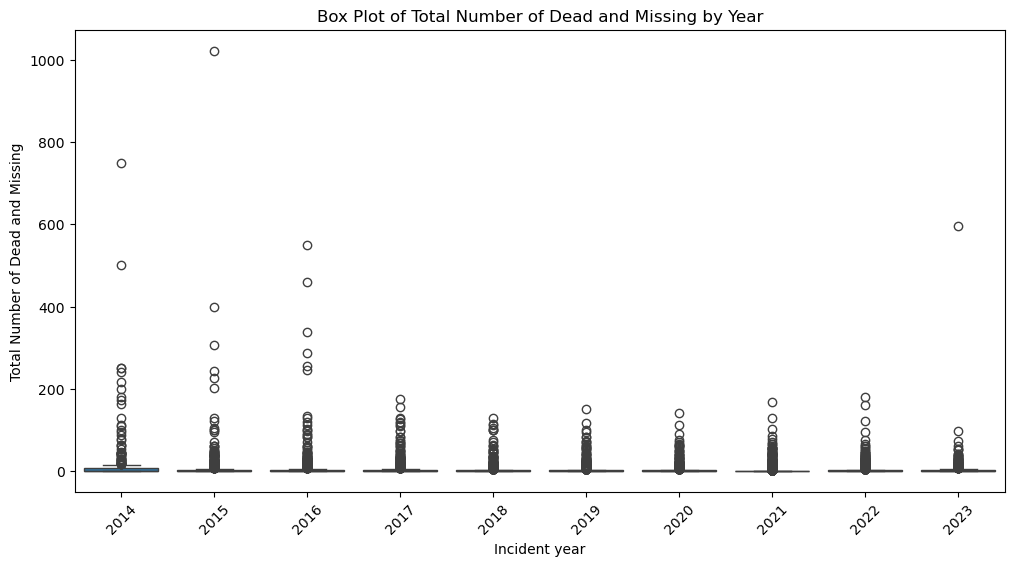

In [139]:
# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Incident year', y='Total Number of Dead and Missing', data=data_cleaned)
plt.title('Box Plot of Total Number of Dead and Missing by Year')
plt.xticks(rotation=45)
plt.show()


### Hypothesis

- **Null Hypothesis (H0)**: There is no significant difference in the total number of dead and missing migrants across the years of incidents.
- **Alternative Hypothesis (H1)**: Certain years have a significantly higher total number of dead and missing migrants compared to others.

We will explore this hypothesis visually through box plots and bar plots, and follow up with statistical testing to confirm the findings.

In [141]:
## Convert  variables into NumPy arrays:Define independent (X) and dependent (y) variables
X = data_cleaned['Incident year'].values.reshape(-1, 1)  # Reshape for sklearn
y = data_cleaned['Total Number of Dead and Missing'].values

In [143]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [145]:
### Run Linear Regression
# Initialize the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

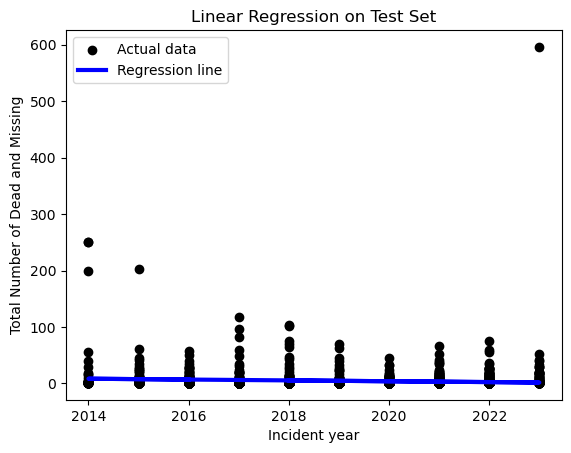

In [151]:
#  Plot the Regression Line
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression line')
plt.title('Linear Regression on Test Set')
plt.xlabel('Incident year')
plt.ylabel('Total Number of Dead and Missing')
plt.legend()
plt.show()

# Interpretation: 
Regression Line: The blue line represents the linear regression model fitted to the test data. It’s almost flat, indicating that the model predicts a relatively constant value of the dependent variable, regardless of the year. This suggests that the model finds little to no trend in the number of dead and missing migrants over time.
Model Performance: Based on the plot, the model appears to have a poor fit. The actual data points are scattered far from the regression line, especially in certain years. This could result in low model performance metrics like R-squared (R²) and high Mean Squared Error (MSE).

In [223]:
#  Check Model Performance

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error (MSE): 163.9265828523041
R2 Score: 0.44438722634128536


In [225]:
### mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 163.9265828523041
R-squared: 0.44438722634128536


In [227]:
#   Compare Predicted vs Actual

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head())


   Actual  Predicted
0       5   7.879995
1       1   2.576352
2       1   2.576352
3       1   2.576352
4       1   2.576352


# Observations:
High MSE: Indicates substantial prediction errors.
Negative R² Score: The model performs worse than a simple average prediction.
Limited Variation in Predictions: Suggests the model isn't capturing data trend
s.
Potential Improvements:
Feature Engineering: Create new features or transform existing ones to better represent the underlying data.
Different Models: Try more complex models like polynomial regression, decision trees, or ensemble methods.
Data Transformation: Consider normalizing, scaling, or applying techniques like logarithmic transformations.
Outlier Detection: Identify and handle outliers, which may be affecting model performance.

# Trying with Region of Incident

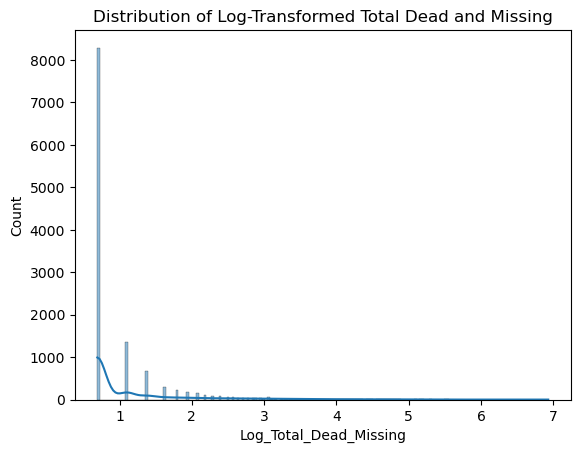

In [180]:
# # Apply log transformation to the dependent variable
data_cleaned['Log_Total_Dead_Missing'] = np.log1p(data_cleaned['Total Number of Dead and Missing'])

# Checking the distribution after transformation
sns.histplot(data_cleaned['Log_Total_Dead_Missing'], kde=True)
plt.title('Distribution of Log-Transformed Total Dead and Missing')
plt.show()

In [182]:
# Using one-hot encoding for the 'Region of Incident' column
encoded_regions = pd.get_dummies(data_cleaned['Region of Incident'], drop_first=True)

In [184]:
# Combine the encoded regions with any other features if you have them
# Assuming you only have the one-hot encoded regions as features
X = encoded_regions
y = data_cleaned['Total Number of Dead and Missing'].values

In [186]:
# # Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [188]:
# Initialize the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [193]:
# # Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 283.6818299476733
R-squared: 0.03848878179924109


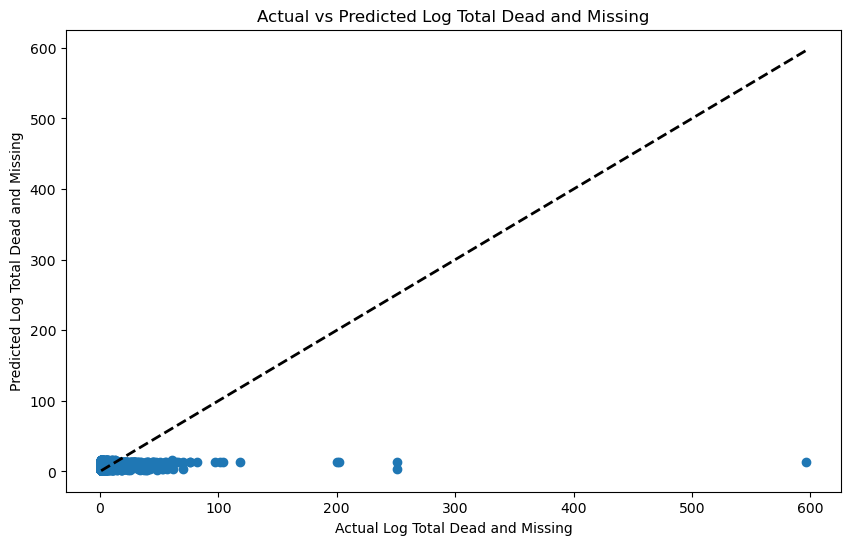

In [195]:
## Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Log Total Dead and Missing')
plt.ylabel('Predicted Log Total Dead and Missing')
plt.title('Actual vs Predicted Log Total Dead and Missing')
plt.show()

In [201]:
# Explore Robust Regression
# Initialize the robust model
robust_model = HuberRegressor()

# Train the model
robust_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_robust = robust_model.predict(X_test)

# Evaluating the model
mse_robust = mean_squared_error(y_test, y_pred_robust)
r2_robust = r2_score(y_test, y_pred_robust)

print(f"Robust Model Mean Squared Error: {mse_robust}")
print(f"Robust Model R-squared: {r2_robust}")

Robust Model Mean Squared Error: 297.0917039030586
Robust Model R-squared: -0.006962646109058612


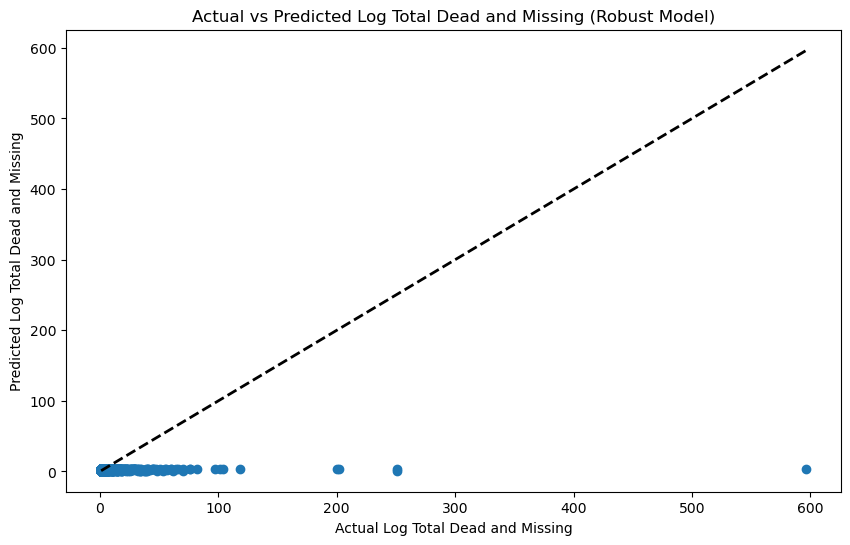

In [203]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_robust)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Log Total Dead and Missing')
plt.ylabel('Predicted Log Total Dead and Missing')
plt.title('Actual vs Predicted Log Total Dead and Missing (Robust Model)')
plt.show()

# Lets try with:  Minimum Estimated Number of Missing AND Total Number of Dead and Missing

Hypotheses:
Null Hypothesis (H0): There is no significant relationship between the "Minimum Estimated Number of Missing" and the "Total Number of Dead and Missing."
Alternative Hypothesis (H1): There is a significant positive relationship between the "Minimum Estimated Number of Missing" and the "Total Number of Dead and Missing."

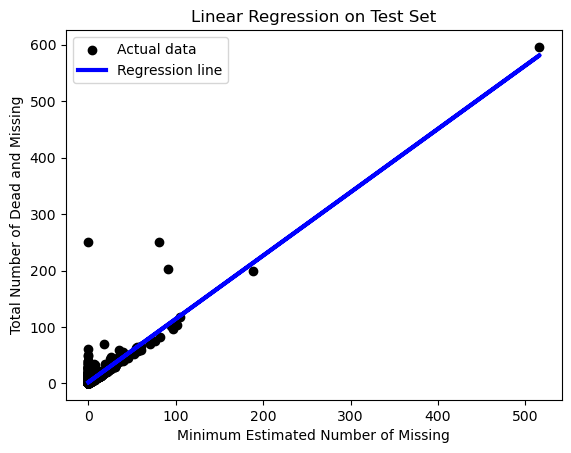

MSE: 57.6903501264623
R² Score: 0.8044643224461897
   Actual  Predicted
0       5   2.337104
1       1   2.337104
2       1   2.337104
3       1   2.337104
4       1   2.337104


In [207]:
# Prepare data
X = data_cleaned[['Minimum Estimated Number of Missing']].values
y = data_cleaned['Total Number of Dead and Missing'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Plot
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression line')
plt.title('Linear Regression on Test Set')
plt.xlabel('Minimum Estimated Number of Missing')
plt.ylabel('Total Number of Dead and Missing')
plt.legend()
plt.show()

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'R² Score: {r2}')

# Compare
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head())

# Observations:
Regression Line Fit: The regression line closely follows the trend of the actual data points, indicating a good fit.
R² Score: An R² of approximately 0.804 suggests that 80.4% of the variance in the "Total Number of Dead and Missing" is explained by the "Minimum Estimated Number of Missing."
MSE Value: A relatively low MSE of about 57.69 indicates that the average squared difference between the actual and predicted values is quite small.
# Interpretation:
The model appears to fit the data well, capturing the relationship effectively.
The high R² score signifies a strong predictive power of the independent variable.
The plot and statistics together suggest that the null hypothesis can likely be rejected, supporting the idea of a significant positive relationship.

# Now with  Number of Dead AND otal Number of Dead and Missing.

# Hypotheses:
Null Hypothesis (H0): There is no significant relationship between the "Number of Dead" and the "Total Number of Dead and Missing."
     Hypothesis (H1):There is a significant positive relationship between the "Number of Dead" and the "Total Number of Dead and Missing."



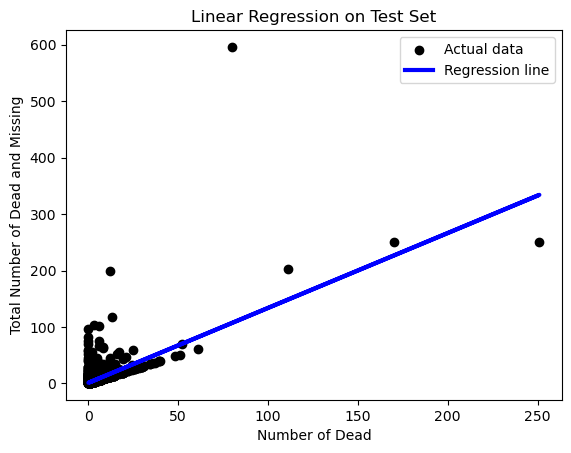

MSE: 163.9265828523041
R² Score: 0.44438722634128536
   Actual  Predicted
0       5   7.879995
1       1   2.576352
2       1   2.576352
3       1   2.576352
4       1   2.576352


In [216]:
# Prepare data
X = data_cleaned[['Number of Dead']].values
y = data_cleaned['Total Number of Dead and Missing'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Plot
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression line')
plt.title('Linear Regression on Test Set')
plt.xlabel('Number of Dead')
plt.ylabel('Total Number of Dead and Missing')
plt.legend()
plt.show()

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'R² Score: {r2}')

# Compare
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head())





# Observations:
Regression Line Fit: The line shows that there’s a general upward trend, but it doesn't align closely with many data points.
R² Score: At around 0.44, the model explains about 44% of the variance, indicating moderate predictive ability.
MSE Value: An MSE of 163.93 suggests there is significant error in predictions.